<h3>Supporting visuals</h3>

In [6]:
# package imports
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# setting global font setting for figure
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']
font = {'color':  'black', 'weight': 'bold', 'size': 16,}
font2 = {'color':  'black', 'weight': 'normal', 'size': 14,}
font3 = {'color':  'black', 'weight': 'normal', 'size': 14,}

# import plot dataframe
plots1 = pd.read_csv("plots1.csv", index_col=0)
plots2 = pd.read_csv("plots2.csv", index_col=0)
plots3 = pd.read_csv("plots3.csv", index_col=0)

<h4>China OOF/ODA alongside Chinese ODA/OOF</h4>

In [3]:
# OECD
oda_oecd = pd.read_csv("oecd/oda_oecd.csv")
oof_oecd = pd.read_csv("oecd/oof_oecd.csv")
oecd = pd.merge(oda_oecd, oof_oecd, on=['LOCATION', 'TIME'], how='outer')
oecd.rename(columns={'Value_x':'ODA', 'Value_y': 'OOF', 'LOCATION': 'Country', 'TIME': 'Year'}, inplace=True)
oecd = oecd[(oecd.Year > 1999) & (oecd.Year < 2015)]
oecd.drop(columns=['INDICATOR_x', 'SUBJECT_x', 'MEASURE_x', 'FREQUENCY_x', 'Flag Codes_x', 'INDICATOR_y', 'SUBJECT_y', 'MEASURE_y', 'FREQUENCY_y', 'Flag Codes_y'], inplace=True)

# OECD TOP5 DONORS
# oecd.pivot_table(index='LOCATION', values='total', aggfunc='sum').sort_values(by='total', ascending=False)
big5 = ['USA', 'DEU', 'FRA', 'JPN', 'GBR']
top5 = oecd[oecd['Country'].isin(big5)]

# CHINA
cnfin= pd.read_csv("cnfin.csv", index_col=0)
china = cnfin[['even_split_commitments', 'flow_class', 'year']].pivot_table(index=['year', 'flow_class'], values='even_split_commitments', aggfunc='sum').reset_index()
china['even_split_commitments'] = (china.even_split_commitments * 1.0612) / 1000000
china_oda = china[china['flow_class'] == 'ODA-like']
china_oof = china_oda = china[china['flow_class'] == 'OOF-like']
china_oda = china_oda.pivot_table(index='year', values='even_split_commitments', aggfunc='sum').reset_index()
china_oof = china_oof.pivot_table(index='year', values='even_split_commitments', aggfunc='sum').reset_index()
china = pd.merge(china_oda, china_oof, on='year', how='outer')
china.rename(columns={'year': 'Year', 'even_split_commitments_x': 'ODA', 'even_split_commitments_y': 'OOF'}, inplace=True)
china['Country'] = 'CHN'

# comparison
comp = top5.append(china).reset_index()
comp.drop(columns='index', inplace=True)
comp['total'] = comp.ODA + comp.OOF
comp.replace({'FRA': 'France', 'DEU': 'Germany', 'JPN': 'Japan', 'GBR': 'United Kingdom', 'USA': 'United States', 'CHN': 'China'}, inplace=True)
comp.head()

,Country,Year,ODA,OOF,total
0,France,2000,6674.028073,22.811993,6696.840066
1,France,2000,0.304828,22.811993,23.116821
2,France,2001,6885.957419,-63.724996,6822.232423
3,France,2001,0.309425,-63.724996,-63.415571
4,France,2002,8378.359421,969.883890,9348.243311


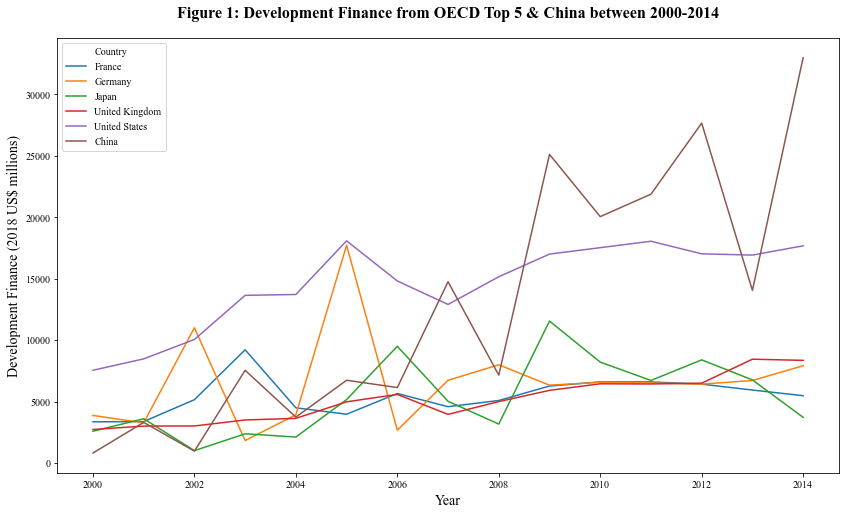

In [4]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(ax=ax, x="Year", y="total", hue="Country", data=comp, ci=None)
ax.set_ylabel("Development Finance (2018 US$ millions)", fontdict=font2)
ax.set_xlabel("Year", fontdict=font2)
ax.set_title('Figure 1: Development Finance from OECD Top 5 & China between 2000-2014', pad=20, fontdict=font)
plt.savefig('fig1.png')

<h4>Support for instrument relevance</h4>

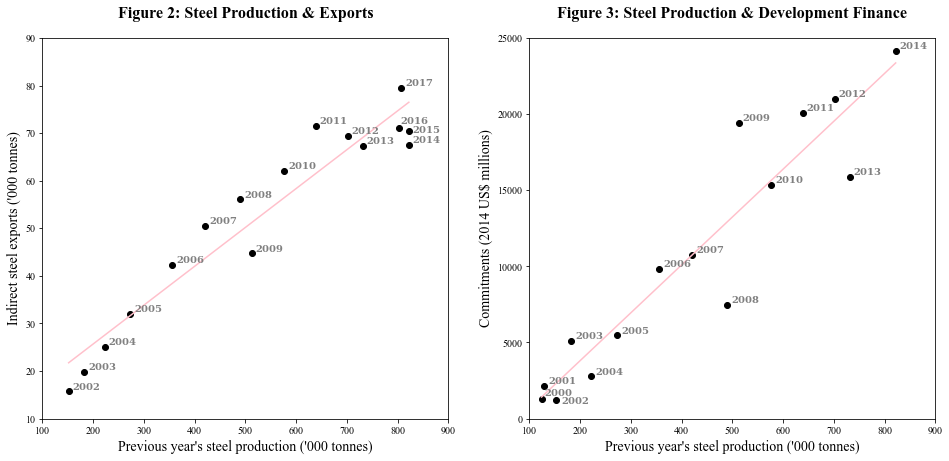

In [66]:
plots1.replace(0, np.nan, inplace=True)
plots1['log_usd_total'] = np.log(plots1.amount_total)
# set subsets
steel_subset = plots1.dropna(subset=['L1_steel', 'exports']).reset_index()
projects_subset = plots1.dropna(subset=['L1_steel', 'amount_total']).reset_index()
# define axes
x = steel_subset['L1_steel']
y = steel_subset['exports']
x2 = projects_subset['L1_steel']
y2 = projects_subset['amount_total']

#define labels
labels = steel_subset['year'][:13]
labels2 = projects_subset['year'][3:]

# plot
f = plt.figure(figsize=(16,7))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.scatter(x, y, marker='o', color='black')
# Fit a linear trend line
ax1.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='pink')
# label points
for i, label in enumerate(labels):
    ax1.annotate(label, (x.iloc[i], y.iloc[i]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
ax1.annotate('2015', (x.iloc[13], y.iloc[13]), xytext=(4,-2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax1.annotate('2016', (x.iloc[14], y.iloc[14]), xytext=(1,4), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax1.annotate('2017', (x.iloc[15], y.iloc[15]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
# set axes limits
ax1.set_xlim([100,900])
ax1.set_ylim([10,90])
# label axes & titles
ax1.set_xlabel("Previous year's steel production ('000 tonnes)", fontdict=font2)
ax1.set_ylabel("Indirect steel exports ('000 tonnes)", fontdict=font2)
ax1.set_title('Figure 2: Steel Production & Exports', pad=20, fontdict=font)

ax2.scatter(x2, y2, marker='o', color='black')
# Fit a linear trend line
ax2.plot(np.unique(x2),
         np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)),
         color='pink')
# label points
ax2.annotate('2000', (x2.iloc[0], y2.iloc[0]), xytext=(3,4), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax2.annotate('2001', (x2.iloc[1], y2.iloc[1]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax2.annotate('2002', (x2.iloc[2], y2.iloc[2]), xytext=(6,-4), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
for i, label in enumerate(labels2):
    ax2.annotate(label, (x2.iloc[i+3], y2.iloc[i+3]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
# set axes limits
ax2.set_xlim([100,900])
ax2.set_ylim([0,25000])
# label axes & titles
ax2.set_xlabel("Previous year's steel production ('000 tonnes)", fontdict=font2)
ax2.set_ylabel("Commitments (2014 US$ millions)", fontdict=font2)
ax2.set_title('Figure 3: Steel Production & Development Finance', pad=20, fontdict=font)

plt.savefig('figs2-3.png')

<h4>Support for reduced form relationship</h4>

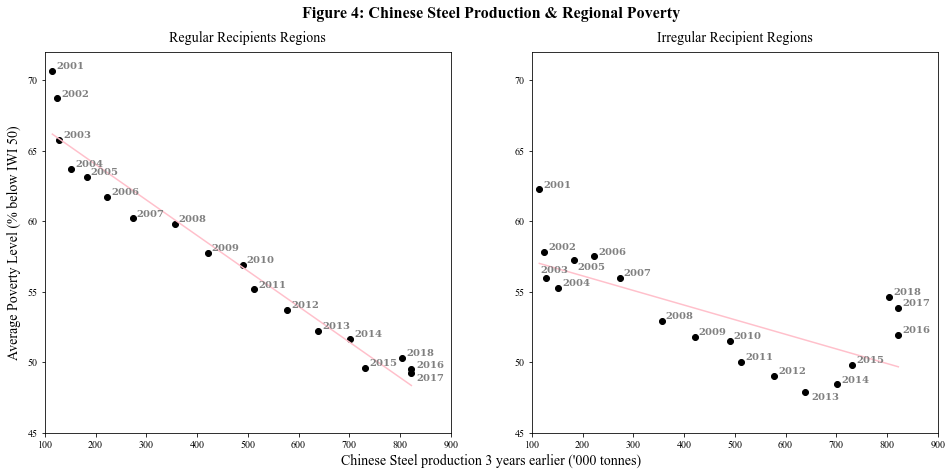

In [13]:
# set subsets
reg_subset = plots2.dropna(subset=['L3_steel', 'reg_iwipov50']).copy()
reg_subset['reg_iwipov50'] = reg_subset['reg_iwipov50'] * 100
irreg_subset = plots2.dropna(subset=['L3_steel', 'irreg_iwipov50']).copy()
irreg_subset['irreg_iwipov50'] = irreg_subset['irreg_iwipov50'] * 100

# define axes
x4 = reg_subset['L3_steel']
y4 = reg_subset['reg_iwipov50']
x5 = irreg_subset['L3_steel']
y5 = irreg_subset['irreg_iwipov50']

#define labels
labels4 = reg_subset['year'][:15]
labels5_1 = irreg_subset['year'][0:2]
labels5_2 = irreg_subset['year'][5:12]
labels5_3 = irreg_subset['year'][13:]

# plot

f4 = plt.figure(figsize=(16,7))
ax04 = f4.add_subplot(111)
ax04.spines['top'].set_color('none')
ax04.spines['bottom'].set_color('none')
ax04.spines['left'].set_color('none')
ax04.spines['right'].set_color('none')
ax04.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax04.set_xlabel("Chinese Steel production 3 years earlier ('000 tonnes)", fontdict=font2)
ax04.set_ylabel("Average Poverty Level (% below IWI 50)", fontdict=font2)
ax04.set_title('Figure 4: Chinese Steel Production & Regional Poverty', pad=34, fontdict=font)

ax4 = f4.add_subplot(121)
ax5 = f4.add_subplot(122)

ax4.scatter(x4, y4, marker='o', color='black')
# Fit a linear trend line
ax4.plot(np.unique(x4),
         np.poly1d(np.polyfit(x4, y4, 1))(np.unique(x4)),
         color='pink')
# label points
for i, label in enumerate(labels4):
    ax4.annotate(label, (x4.iloc[i], y4.iloc[i]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
ax4.annotate('2016', (x4.iloc[15], y4.iloc[15]), xytext=(5,1), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax4.annotate('2017', (x4.iloc[16], y4.iloc[16]), xytext=(5,-8), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax4.annotate('2018', (x4.iloc[17], y4.iloc[17]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')

# set axes limits
ax4.set_xlim([100,900])
ax4.set_ylim([45,72])
# label axes & titles
ax4.set_title('Regular Recipients Regions', pad=10, fontdict=font3)

ax5.scatter(x5, y5, marker='o', color='black')
# Fit a linear trend line
ax5.plot(np.unique(x5),
         np.poly1d(np.polyfit(x5, y5, 1))(np.unique(x5)),
         color='pink')
# label points
for i, label in enumerate(labels5_1):
    ax5.annotate(label, (x5.iloc[i], y5.iloc[i]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
for i, label in enumerate(labels5_2):
    ax5.annotate(label, (x5.iloc[i+5], y5.iloc[i+5]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
for i, label in enumerate(labels5_3):
    ax5.annotate(label, (x5.iloc[i+13], y5.iloc[i+13]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
    pass
ax5.annotate('2003', (x5.iloc[2], y5.iloc[2]), xytext=(-6,5), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax5.annotate('2004', (x5.iloc[3], y5.iloc[3]), xytext=(4,2), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax5.annotate('2005', (x5.iloc[4], y5.iloc[4]), xytext=(4,-10), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')
ax5.annotate('2013', (x5.iloc[12], y5.iloc[12]), xytext=(6,-8), textcoords='offset points', color='grey', fontfamily='serif', fontweight='bold')

# set axes limits
ax5.set_xlim([100,900])
ax5.set_ylim([45,72])
# label axes & titles
ax5.set_title('Irregular Recipient Regions', pad=10, fontdict=font3)

plt.savefig('fig4.png')

#### Country Level

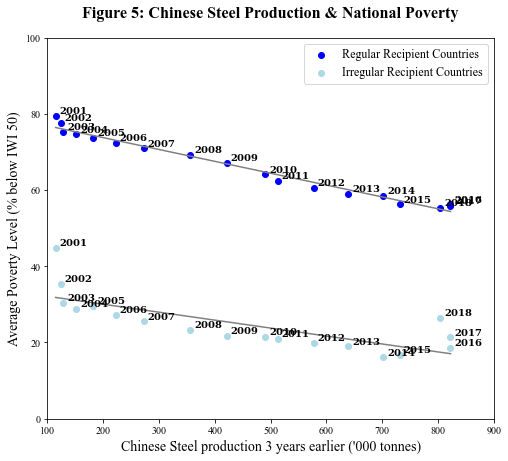

In [32]:
# set subsets
reg_subset = plots3.dropna(subset=['L3_steel', 'reg_iwipov50']).copy()
reg_subset['reg_iwipov50'] = reg_subset['reg_iwipov50'] * 100
irreg_subset = plots3.dropna(subset=['L3_steel', 'irreg_iwipov50']).copy()
irreg_subset['irreg_iwipov50'] = irreg_subset['irreg_iwipov50'] * 100

# define axes
x7 = reg_subset['L3_steel']
y7 = reg_subset['reg_iwipov50']
x8 = irreg_subset['L3_steel']
y8 = irreg_subset['irreg_iwipov50']

#define labels
labels7 = reg_subset['year'][:]
labels8 = irreg_subset['year'][:]

# plot
f7, ax07 = plt.subplots(figsize=(8,7))
ax07.set_xlabel("Chinese Steel production 3 years earlier ('000 tonnes)", fontdict=font2)
ax07.set_ylabel("Average Poverty Level (% below IWI 50)", fontdict=font2)
ax07.set_title('Figure 5: Chinese Steel Production & National Poverty', pad=20, fontdict=font)

# set axes limits
ax07.set_xlim([100,900])
ax07.set_ylim([0,100])

# Regualr recipients axes
ax07.scatter(x7, y7, marker='o', color='blue', label='Regular Recipient Countries')
# Fit a linear trend line
ax07.plot(np.unique(x7),
         np.poly1d(np.polyfit(x7, y7, 1))(np.unique(x7)),
         color='grey')
# label points
for i, label in enumerate(labels7):
    ax07.annotate(label, (x7.iloc[i], y7.iloc[i]), xytext=(4,2), textcoords='offset points', color='black', fontfamily='serif', fontweight='bold')
    pass

# irregular recipients axes
ax07.scatter(x8, y8, marker='o', color='lightblue', label='Irregular Recipient Countries')
# Fit a linear trend line
ax07.plot(np.unique(x8),
         np.poly1d(np.polyfit(x8, y8, 1))(np.unique(x8)),
         color='grey')
# label points
for i, label in enumerate(labels8):
    ax07.annotate(label, (x8.iloc[i], y8.iloc[i]), xytext=(4,2), textcoords='offset points', color='black', fontfamily='serif', fontweight='bold')
    pass
plt.legend(loc="upper right", fontsize=12)

plt.savefig('fig5.png')

<h5>Seperating projects in Africa, Latin America (+ Carribean) and Asia:</h5>

<p>Countries in Africa, Latin America (+ Carribean) & Asia make up 85 of the 104 countries with projects (82%) in our subset of the AidData Chinese Finance dataset.</p>
<ul>
    <li>Africa:</li>
    <ul>
        <li>2566 projects within;</li>
        <li>333 subnational regions within;</li>
        <li>48 countries.</li>
        <li>With a minimum of 42 and maximum of 291 projects per year.</li>
    </ul>
        <li>Asia:</li>
    <ul>
        <li>1072 projects within;</li>
        <li>154 subnational regions within;</li>
        <li>26 countries.</li>
        <li>With a minimum of 22 and maximum of 122 projects per year.</li>
    </ul>
    <li>Latin America (+Carribean):</li>
    <ul>
        <li>206 projects within;</li>
        <li>78 subnational regions within;</li>
        <li>18 countries.</li>
        <li>With a minimum of 1 and maximum of 49 projects per year.</li>
    </ul>
</ul>

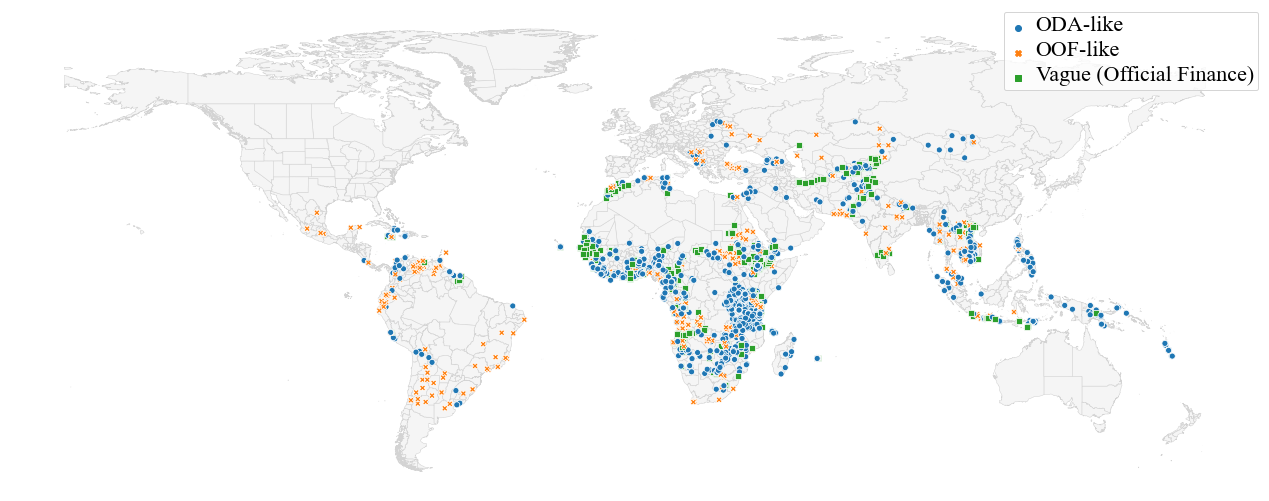

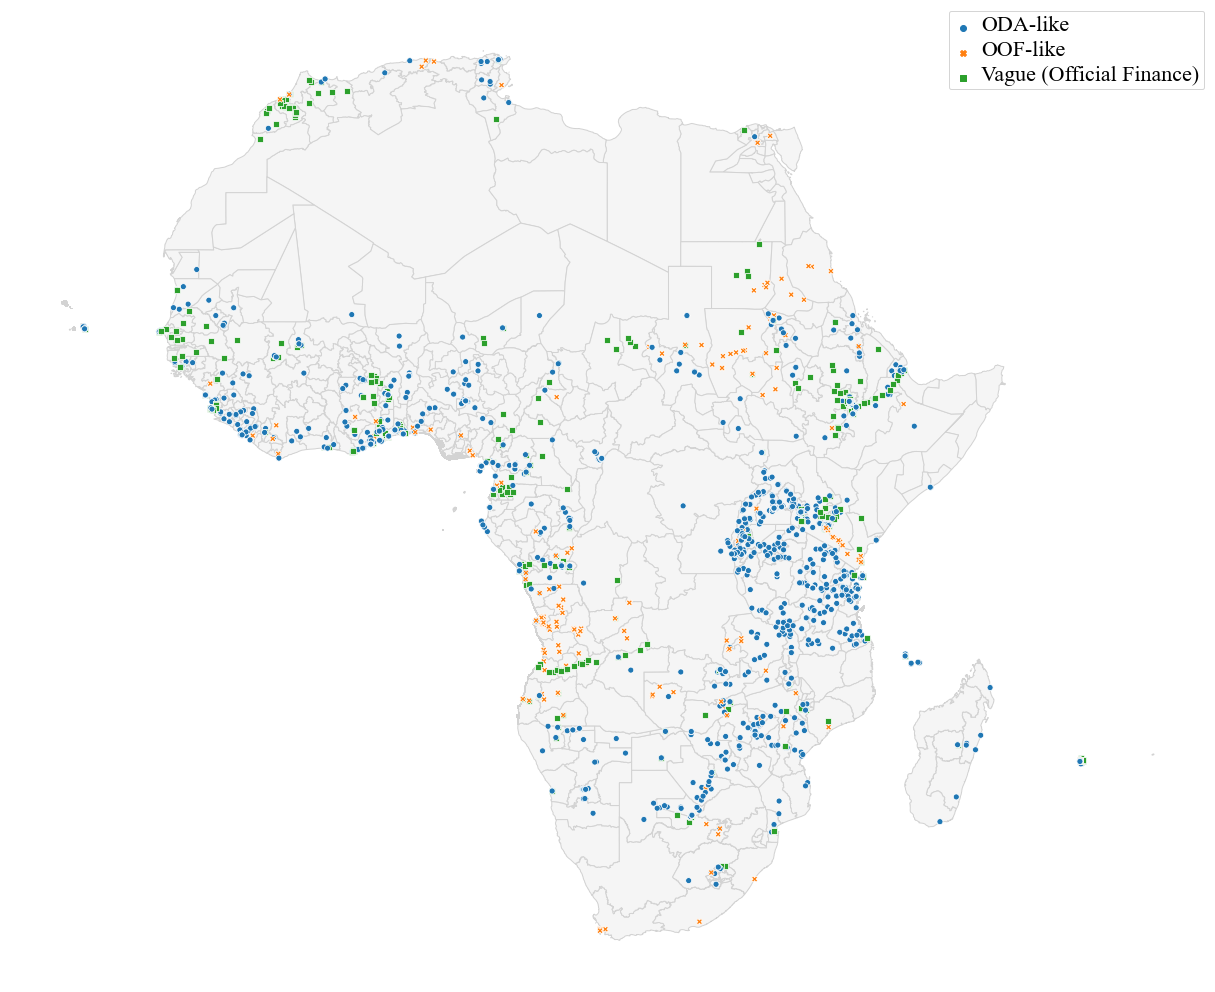

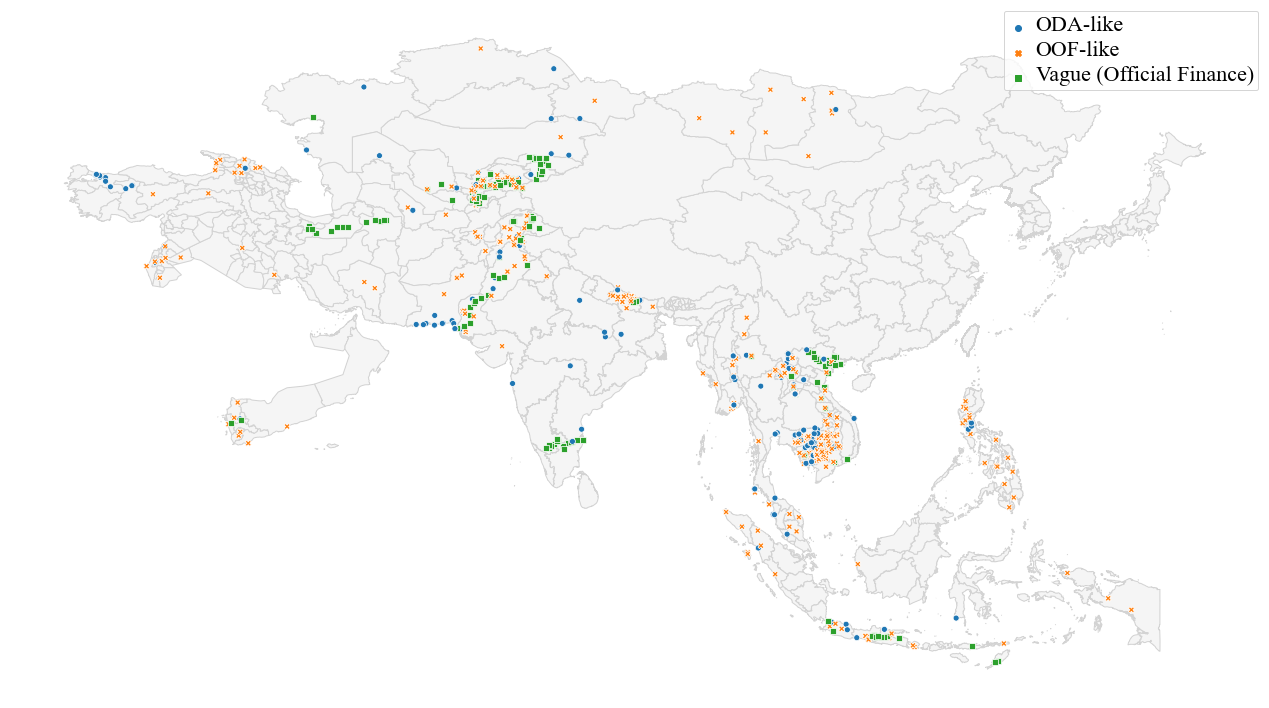

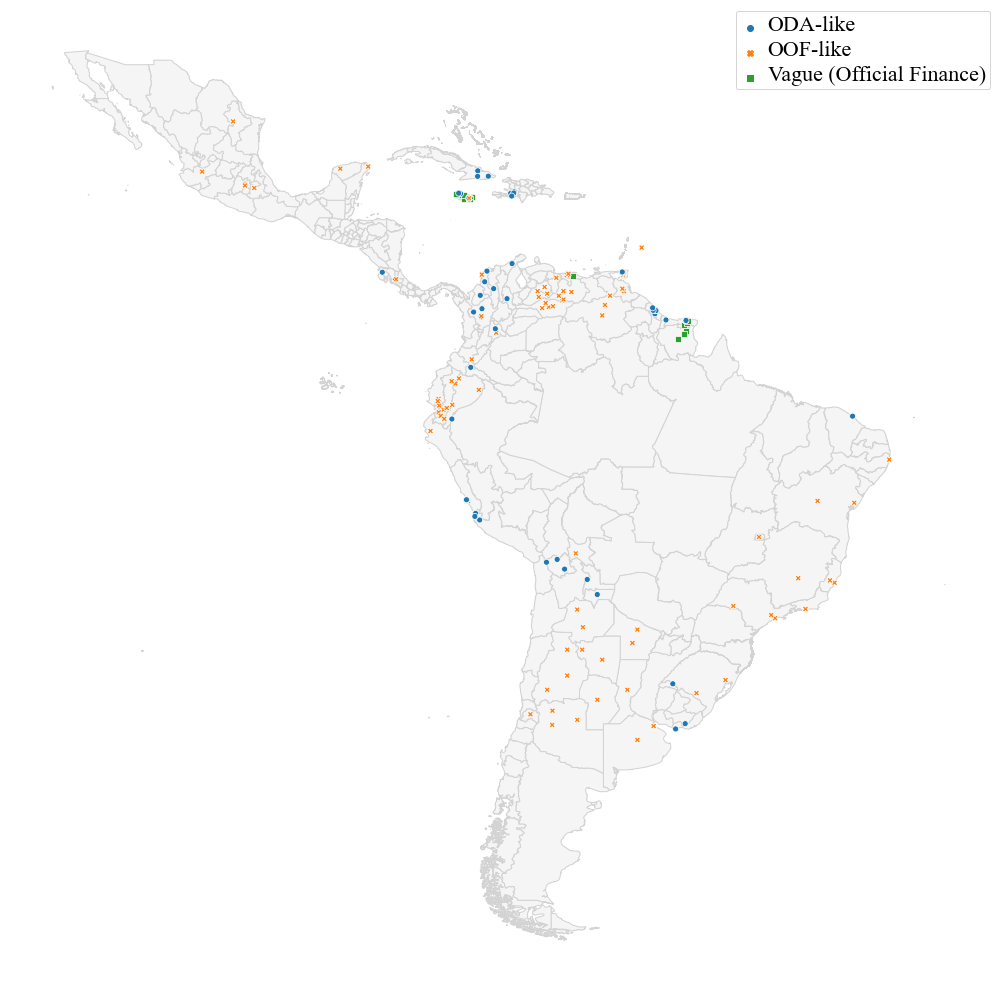

In [28]:
# prepare shp file
gdl_shp = gpd.read_file('shapefiles/GDL-SHP-Clean-v4.shp')
geonames1 = pd.read_csv('geonames.csv', index_col=0)[['ISO-3166alpha3', 'Continent']].copy()
geonames1.rename(columns={'ISO-3166alpha3':'iso_code'}, inplace=True)
gdl_shp = pd.merge(gdl_shp, geonames1[['iso_code', 'Continent']], how="left", on='iso_code')
# split by continent
gdl_shp_af = gdl_shp[gdl_shp['Continent']=='AF'].copy()
gdl_shp_sa = gdl_shp[gdl_shp['Continent'].isin(['NCA', 'SA'])].copy()
gdl_shp_sa = gdl_shp_sa[~gdl_shp_sa['iso_code'].isin(['USA', 'CAN', 'GRL'])].copy()
gdl_shp_as = gdl_shp[gdl_shp['Continent']=='AS'].copy()

# splitting project point data into subsets
cnfin = pd.read_csv("cnfin.csv", index_col=0)
cnfin = cnfin.dropna(subset=['Continent', 'iso_code', 'longitude', 'latitude', 'flow_class']).reset_index()
cnfin.rename(columns={'flow_class': 'Flow:'}, inplace=True)
cnfin_af = cnfin[cnfin['Continent'] == 'AF'].reset_index()
cnfin_sa = cnfin[cnfin['Continent'].isin(['NCA', 'SA'])]
cnfin_sa = cnfin_sa[~cnfin_sa['iso_code'].isin(['USA', 'CAN', 'GRL'])].reset_index()
cnfin_as = cnfin[cnfin['Continent'] == 'AS'].reset_index()

# World
world, ax = plt.subplots(figsize=(22.5, 18), frameon=False)
gdl_shp.plot(ax=ax, color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
sns.scatterplot(x="longitude", y="latitude", hue="Flow:", style="Flow:", data=cnfin)
world.patch.set_visible(False)
ax.axis('off')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

# Africa
af, ax1 = plt.subplots(figsize=(22.5, 18), frameon=False)
gdl_shp_af.plot(ax=ax1, color = "whitesmoke", edgecolor = "lightgrey", linewidth = 1)
sns.scatterplot(x="longitude", y="latitude", hue="Flow:", style="Flow:", data=cnfin_af)
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles=handles1[1:], labels=labels1[1:])
af.patch.set_visible(False)
ax1.axis('off')

# Asia
asia, ax2 = plt.subplots(figsize=(22.5, 18), frameon=False)
gdl_shp_as.plot(ax=ax2, color = "whitesmoke", edgecolor = "lightgrey", linewidth = 1)
sns.scatterplot(x="longitude", y="latitude", hue="Flow:", style="Flow:", data=cnfin_as)
handles2, labels2 = ax1.get_legend_handles_labels()
ax2.legend(handles=handles2[1:], labels=labels2[1:])
asia.patch.set_visible(False)
ax2.axis('off')

# Latin America + Carribean
sa, ax3 = plt.subplots(figsize=(22.5, 18), frameon=False)
gdl_shp_sa.plot(ax=ax3, color = "whitesmoke", edgecolor = "lightgrey", linewidth = 1)
sns.scatterplot(x="longitude", y="latitude", hue="Flow:", style="Flow:", data=cnfin_sa)
handles3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(handles=handles3[1:], labels=labels3[1:])
sa.patch.set_visible(False)
ax3.axis('off')

plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax1.get_legend().get_texts(), fontsize='22')
plt.setp(ax2.get_legend().get_texts(), fontsize='22')
plt.setp(ax3.get_legend().get_texts(), fontsize='22')

plt.show()